In [1]:
from matplotlib import pyplot as plt
from numpy.random import randn
import random
%matplotlib inline
import numpy as np
from skimage import color

import sys
sys.path.append("..")
from src import hierarchic_blending_operator
from src import color_converter
from src import color_operations
from src import color_schemes
from src import picture_worker
from src import helper

Number of points

In [2]:
size = 400

Number of Gaussians to use

In [3]:
number_of_gaussians = 5

Interval to use

In [4]:
x_min, x_max = -10, 10
y_min, y_max = -10, 10
variance_min, variance_max = 2, 30

Color-Maps to use

Matplotlib

In [5]:
matplotlib_color_maps = [color_schemes.random_matplotlib_colorschemes() for i in range(number_of_gaussians)][:number_of_gaussians]

In [6]:
matplotlib_color_maps

['gist_rainbow_r', 'PRGn', 'hot_r', 'CMRmap', 'seismic_r']

Monochrom

In [7]:
monochromatic_color_maps = [[1,0,0,1], [0,1,0,1], [0,0,1,1], [1,1,0,1], [0,1,1,1]]

Brewer

In [8]:
brewer_color_maps = ["blue", "green", "orange", "purple", "red"]

Intervall in which to scale

In [9]:
lower_border, upper_border = 0., 1

In [10]:
def generate_gaussian(verbose=False):
    X, Y, Z = helper.get_random_gaussian(x_min,x_max,y_min,y_max,variance_min, variance_max,size,0.6)
    return Z


In [11]:
def generate_matplotlib_color_grid(Z, colorscheme, verbose=False):
    return  picture_worker.get_colorgrid(Z,color_schemes.matplotlib_colorschemes,10,colorscheme=colorscheme, verbose=verbose)


In [12]:
def generate_monochromatic_colorgrid(Z,startcolor ,x_min, x_max, verbose=False):
    img, Z_alpha = picture_worker.get_colorgrid(Z,color_schemes.create_monochromatic_colorscheme,10,False, 
                                                min_value = x_min, max_value = x_max, 
                                                startcolor=startcolor, verbose=verbose)
    return img

In [13]:
def generate_brewer_color_grid(Z,colorscheme ,x_min, x_max, verbose=False):
    return picture_worker.get_colorgrid(Z,color_schemes.create_color_brewer_colorscheme,10,min_value = x_min, max_value = x_max,colorscheme=colorscheme, verbose=verbose)

In [14]:
img_list_matplotlib = []
z_list = []
for i in range(number_of_gaussians):
    z = generate_gaussian()
    z_list.append(z)

### Default Coloring

In [15]:
default_img_list = helper.generate_monochromatic_plot_from_gaussians(z_list[:number_of_gaussians], monochromatic_color_maps[:number_of_gaussians])

## Weight Color-space

In [16]:
z_sum = z_list[0].copy()
z_min, z_max = np.min(z_list[0]), np.max(z_list[1])
for i in z_list:
    i_min = np.min(i)
    i_max = np.max(i)
    print("Min: {} vs {}".format(z_min, i_min))
    print("Max: {} vs {}".format(z_max, i_max))
    z_min = np.min([z_min,i_min])
    z_max = np.max([z_max,i_max])
    z_sum += i

Min: 4.468956416134458e-08 vs 4.468956416134458e-08
Max: 0.022506590276767886 vs 0.009098177839178637
Min: 4.468956416134458e-08 vs 7.052088744239058e-26
Max: 0.022506590276767886 vs 0.022506590276767886
Min: 7.052088744239058e-26 vs 6.8624842687920926e-18
Max: 0.022506590276767886 vs 0.01591519639818927
Min: 7.052088744239058e-26 vs 5.822913740295629e-08
Max: 0.022506590276767886 vs 0.00941089885777173
Min: 7.052088744239058e-26 vs 1.047697654313658e-09
Max: 0.022506590276767886 vs 0.01677577996999998


#### Matplotlib

In [17]:
for z,i in zip(z_list, matplotlib_color_maps):
    img, alpha = generate_matplotlib_color_grid(z, i, False)
    img_list_matplotlib.append(img)

#### Monochromatic

In [18]:
img_list_monochromatic = []

for z, colormap in zip(z_list, monochromatic_color_maps):
    z_min_weight = (upper_border-lower_border)*(np.min(z) - z_min) / (z_max - z_min)+lower_border
    z_max_weight = (upper_border-lower_border)*(np.max(z) - z_min) / (z_max - z_min)+lower_border
    print(z_max_weight)
    img = generate_monochromatic_colorgrid(z, colormap, z_min_weight, z_max_weight, verbose=False)
    img_list_monochromatic.append(img)

0.4042450556613235
1.0
0.7071349414761199
0.41813969784156946
0.7453719005724535


#### Colorbrewer

In [19]:
img_list_brewer = []

for z, colormap in zip(z_list, brewer_color_maps):
    z_min_weight = (upper_border-lower_border)*(np.min(z) - z_min) / (z_max - z_min)+lower_border
    z_max_weight = (upper_border-lower_border)*(np.max(z) - z_min) / (z_max - z_min)+lower_border
    img, _ = generate_brewer_color_grid(z, colormap, z_min_weight, z_max_weight, verbose=False)
    img_list_brewer.append(img)

## RGB-Colorspace

Matplotlib is pointless since you cant weight it. Atleast I dunno how

### Matplotlib Colorschemes

In [20]:
mixed_matplotlib, alpha_new = picture_worker.combine_multiple_images_hierarchic(hierarchic_blending_operator.porter_duff_source_over, img_list_matplotlib, z_list)

In [21]:
mixed_matplotlib = picture_worker.find_contour_lines(z_sum, mixed_matplotlib, 7)

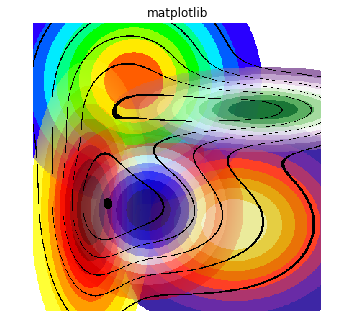

In [22]:
#displays an image
plt.imshow(mixed_matplotlib)
plt.subplots_adjust(0, 0, 1, 1)
plt.axis("off")
plt.title("matplotlib")
plt.show()

### Monochromatic Colorschemes

In [23]:
rgb_mixed_monochrom, alpha_new = picture_worker.combine_multiple_images_hierarchic(hierarchic_blending_operator.porter_duff_source_over, img_list_monochromatic, z_list)

In [ ]:
rgb_mixed_monochrom = picture_worker.find_contour_lines(z_sum, rgb_mixed_monochrom, 7)

Text(0.5, 1.0, 'Rgb-weighted monochrom')

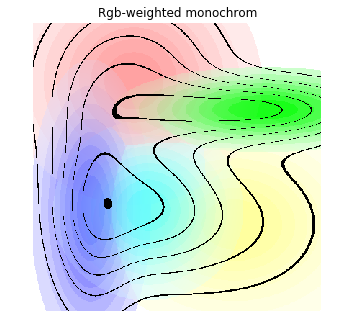

In [ ]:
#displays an image
plt.imshow(rgb_mixed_monochrom)
plt.subplots_adjust(0, 0, 1, 1)
plt.axis("off")
plt.title("Rgb-weighted monochrom")

### Colorbrewer Colorscheme

In [ ]:
rgb_mixed_brewer, alpha_new = picture_worker.combine_multiple_images_hierarchic(hierarchic_blending_operator.porter_duff_source_over, img_list_brewer, z_list)

In [ ]:
rgb_mixed_brewer = picture_worker.find_contour_lines(z_sum, rgb_mixed_brewer, 7)

Text(0.5, 1.0, 'Rgb-weighted brewer')

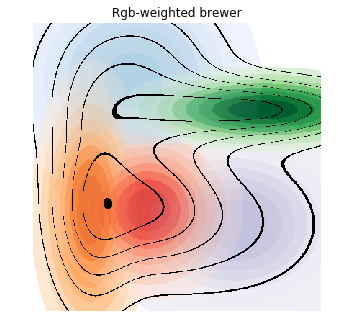

In [ ]:
#displays an image
plt.imshow(rgb_mixed_brewer)
plt.subplots_adjust(0, 0, 1, 1)
plt.axis("off")
plt.title("Rgb-weighted brewer")

### Comaring

In [ ]:
rgb_mixed_monochrom_default, alpha_new = picture_worker.combine_multiple_images_hierarchic(hierarchic_blending_operator.porter_duff_source_over, default_img_list, z_list)
rgb_mixed_monochrom_default = picture_worker.find_contour_lines(z_sum, rgb_mixed_monochrom_default, 7)

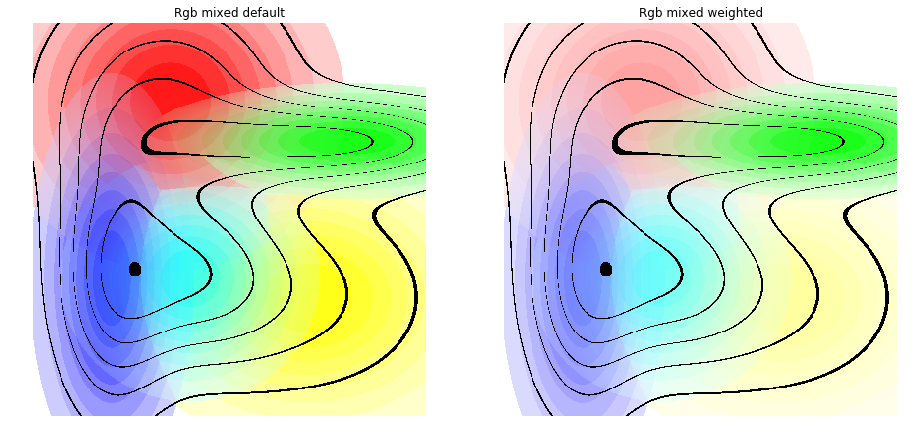

In [ ]:
fig, (ax_0, ax_1) = plt.subplots(1,2)
ax_0.imshow(rgb_mixed_monochrom_default)
ax_0.axis("off")
ax_0.set_title("Rgb mixed default")
ax_1.imshow(rgb_mixed_monochrom)
ax_1.axis("off")
ax_1.set_title("Rgb mixed weighted")
plt.subplots_adjust(bottom=0.0, left=0, right=2, top=2)

## Lab-Colorspace

### Matplotlib Colorscheme

In [ ]:
mixed_matplotlib, alpha_new = picture_worker.combine_multiple_images_hierarchic(hierarchic_blending_operator.porter_duff_source_over, img_list_matplotlib, z_list, color_space="lab")

In [ ]:
mixed_matplotlib = picture_worker.find_contour_lines(z_sum, mixed_matplotlib, 7)

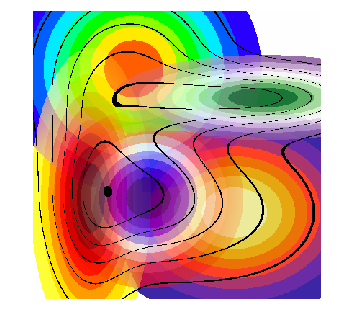

In [ ]:
#displays an image
plt.imshow(mixed_matplotlib)
plt.subplots_adjust(0, 0, 1, 1)
plt.axis("off")
plt.show()

### Monochromatic Color-Scheme

In [ ]:
lab_mixed_monochrom, alpha_new = picture_worker.combine_multiple_images_hierarchic(hierarchic_blending_operator.porter_duff_source_over, img_list_monochromatic, z_list, color_space="lab")

In [ ]:
lab_mixed_monochrom = picture_worker.find_contour_lines(z_sum, lab_mixed_monochrom, 7)

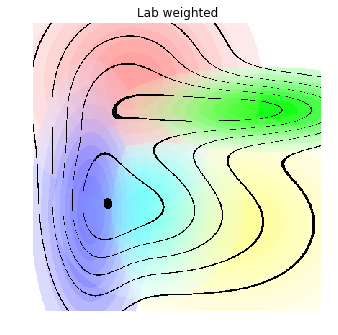

In [ ]:
#displays an image
plt.imshow(lab_mixed_monochrom)
plt.subplots_adjust(0, 0, 1, 1)
plt.axis("off")
plt.title("Lab weighted")
plt.show()

### Colorbrewer Colorscheme

In [ ]:
rgb_mixed_brewer, alpha_new = picture_worker.combine_multiple_images_hierarchic(hierarchic_blending_operator.porter_duff_source_over, img_list_brewer, z_list, color_space="lab")

In [ ]:
rgb_mixed_brewer = picture_worker.find_contour_lines(z_sum, rgb_mixed_brewer, 7)

In [ ]:
#displays an image
plt.imshow(rgb_mixed_brewer)
plt.subplots_adjust(0, 0, 1, 1)
plt.axis("off")
plt.title("Rgb-weighted brewer")

### Comparisson

In [ ]:
lab_mixed_monochrom_default, alpha_new = picture_worker.combine_multiple_images_hierarchic(hierarchic_blending_operator.porter_duff_source_over, default_img_list, z_list, color_space="lab")
lab_mixed_monochrom_default = picture_worker.find_contour_lines(z_sum, lab_mixed_monochrom_default, 7)

In [ ]:
fig, (ax_0, ax_1) = plt.subplots(1,2)
ax_0.imshow(lab_mixed_monochrom_default)
ax_0.axis("off")
ax_0.set_title("Lab mixed default")
ax_1.imshow(lab_mixed_monochrom)
ax_1.axis("off")
ax_1.set_title("Lab mixed weighted")

plt.subplots_adjust(bottom=0.0, left=0, right=2, top=2)

## Comparing all together

In [ ]:
fig, ((ax_0, ax_1), (ax_2, ax_3)) = plt.subplots(2,2)
fig.subplots_adjust(wspace=-0.5)
ax_0.imshow(rgb_mixed_monochrom_default)
ax_0.axis("off")
ax_0.set_title("Rgb mixed default")
ax_1.imshow(rgb_mixed_monochrom)
ax_1.axis("off")
ax_1.set_title("Rgb mixed weighted")
ax_2.imshow(lab_mixed_monochrom_default)
ax_2.axis("off")
ax_2.set_title("Lab mixed default")
ax_3.imshow(lab_mixed_monochrom)
ax_3.axis("off")
ax_3.set_title("Lab mixed weighted")
plt.subplots_adjust(bottom=0.0, left=0, right=3, top=3)